# 행정구역별 의료기관 현황 분석해보기. 
## 블록맵을 시각화 
### 필요한 데이터 준비물 
### 1) 공공보건의료 기관 현황.csv 
### 2) 행정구역별 시군구 인구수 엑셀 파일 

## 작업 
### 1. 행정구역별 주소 수정. 
### 2. 행정구역별 의료기관 수 집계
### 3. 행정구역별 인구수 정리 
### 4. 테이블 정리, 내부(공통된 행만 뽑아서), 외부(모든 행을 다 합치기)

### 블록맵: 구역의 경계선을 단순화 작업하고, -> 블록(사각형모양으로 ) 그려서 지도에 표기. 
### 히트맵으로 온도로 시각화 하는 것과 거의 비슷. 


## 데이터수집
### 준비물)
### 공공데이터 -> 공공보건 의료기관 현황 데이터 csv 다운로드 
### 1) 보건복지부 공공보건 의료기관 현황

### 2)행정구역 시군구 인구수 엑셀파일

In [1]:
import pandas as pd 
pd.set_option("mode.chained_assignment",None)
import numpy as np 

data = pd.read_csv("./공공보건의료기관현황.csv",index_col=0, encoding="cp949", engine="python")
data


,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,청풍호노인사랑병원,시군구립,제천시 노인전문병원 설치및 운영에 관한 조례,충청북도,해당없음,33280576,요양병원,187,27207,충청북도 제천시 금성면 청풍호로 1147,www.cplove.co.kr,043-646-0808,043-648-5827,NaN
217,충주시 노인전문병원,시군구립,충주시노인전문병원설치 및 운영에관한 조례,충청북도,해당없음,33280088,요양병원,300,27442,충청북도 충주시 동량면 대전리 1686-28,www.hyolife.com,043-855-9393,043-855-8866,NaN
218,충청북도 충주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,충청북도,해당없음,33100063,종합병원,292,27468,충청북도 충주시 안림로 239-50(안림동 134),www.cjmct.or.kr,043-871-0114,043-843-4231,NaN


In [2]:
# 공공 의료기관의 주소 데이터 정리 작업. 
addr =pd.DataFrame(data["주소"].apply(lambda v : v.split()[:2]).tolist(), columns=["시도","군구"])
addr.head()

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [3]:
# 해당 주소에서 1차 지역명, 2차 지역명으로 추출후 , 중복 제거 
addr["시도"].unique()

# 창원시 -> 경상남도에 포함, 시도 컬럼에 있으면 안됨, 2차 지역명 군구에 있어야 함. 
# 경산시 -> 경상북도에 포함
# 천안시 -> 충청남도
# 수정해보기. 
addr[addr["시도"] == "창원시"]
addr.iloc[27] = ["경상남도", "창원시"]
addr.iloc[27]

addr.iloc[31] = ["경상남도", "창원시"]
addr.iloc[31]

addr[addr["시도"] == "경산시"]
addr.iloc[47] = ["경상북도", "경산시"]
addr.iloc[47]

addr[addr["시도"] == "천안시"]

# 209 , 210
addr.iloc[209] = ["충청남도", "천안시"]
addr.iloc[210] = ["충청남도", "천안시"]
# print(addr.iloc[209])
# print(addr.iloc[210])

addr["시도"].unique()


array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [4]:
# 1차 지역명 통일하기
# 강원도 -> 강원특별자치도
# 경기 -> 경기도 
# 경북 -> 경상북도 
# 충북 -> 충청북도 
# 충남 -> 충청남도
# 전북 -> 전라북도 
# 전남 -> 전라남도
# 서울시 -> 서울특별시
# 대전시 -> 대전광역시 
# 부산특별시 -> 부산광역시

addr_alias = {
  "경기" : "경기도",
  "강원도" : "강원특별자치도",
  "경기" : "경기도" ,
  "경북" : "경상북도", 
  "충북" : "충청북도" ,
  "충남" : "충청남도",
  "전북" : "전라북도" ,
  "전남" : "전라남도",
  "서울시" : "서울특별시",
  "대전시" : "대전광역시", 
  "부산특별시" : "부산광역시"
}

addr["시도"] = addr["시도"].apply(lambda v: addr_alias.get(v,v))
addr["시도"].unique()




array(['강원특별자치도', '경기도', '경남', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시',
       '충청남도', '울산광역시'], dtype=object)

In [5]:
# 2차 지역명 데이터 확인. 
addr["군구"].unique()

# "아란13길" : 제주시로 변경하기.
addr[addr["군구"] == "아란13길"]
addr.iloc[75] = ["제주특별자치도","제주시"]
addr["군구"].unique()
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [6]:
# 행정구역별 의료기관 수 확인 하기. 
# 새 컬럼 추가. 시도군구
addr["시도군구"] = addr.apply(lambda r: r["시도"]+" "+r["군구"], axis=1)
addr.head()


,시도,군구,시도군구
0,강원특별자치도,춘천시,강원특별자치도 춘천시
1,강원특별자치도,삼척시,강원특별자치도 삼척시
2,강원특별자치도,영월군,강원특별자치도 영월군
3,강원특별자치도,원주시,강원특별자치도 원주시
4,강원특별자치도,강릉시,강원특별자치도 강릉시


In [7]:
# addr  위에 주소에, count 컬럼 추가하기. 
addr["count"] = 0
addr.head()

,시도,군구,시도군구,count
0,강원특별자치도,춘천시,강원특별자치도 춘천시,0
1,강원특별자치도,삼척시,강원특별자치도 삼척시,0
2,강원특별자치도,영월군,강원특별자치도 영월군,0
3,강원특별자치도,원주시,강원특별자치도 원주시,0
4,강원특별자치도,강릉시,강원특별자치도 강릉시,0


In [8]:
# 시도 군구에 대해서 갯수 집계 해보기. 
# 위에 컬럼 생성시 시도군구 뒤에 공백 들어가서 인식을 못함. 오류 
addr_group = pd.DataFrame(addr.groupby(["시도", "군구","시도군구"], as_index=False).count())
addr_group.head()

,시도,군구,시도군구,count
0,강원특별자치도,강릉시,강원특별자치도 강릉시,4
1,강원특별자치도,동해시,강원특별자치도 동해시,1
2,강원특별자치도,삼척시,강원특별자치도 삼척시,1
3,강원특별자치도,속초시,강원특별자치도 속초시,1
4,강원특별자치도,양구군,강원특별자치도 양구군,1


In [9]:
# 인덱스, 시도군구로 설정하기. 
addr_group = addr_group.set_index("시도군구")
addr_group.head()

,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4
강원특별자치도 동해시,강원특별자치도,동해시,1
강원특별자치도 삼척시,강원특별자치도,삼척시,1
강원특별자치도 속초시,강원특별자치도,속초시,1
강원특별자치도 양구군,강원특별자치도,양구군,1


In [10]:
# 행정구역별 시군구 인구수 엑셀 파일 정리  -> 인구수 , 2023.11 
population = pd.read_excel("./행정구역데이터.xlsx")
population.head()


,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51337076,25572695,25764381
1,서울특별시,소계,9390925,4543055,4847870
2,서울특별시,종로구,139497,67393,72104
3,서울특별시,중구,121230,58631,62599
4,서울특별시,용산구,214381,102925,111456


In [11]:
# 1차 지역명, 2차 지역명, 모양 맞추기. 
# 	행정구역(시군구)별(1) : 시도
# 	행정구역(시군구)별(2) : 군구
population = population.rename(columns={"행정구역(시군구)별(1)" : "시도","행정구역(시군구)별(2)" : "군구"}) 
population.head()


,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51337076,25572695,25764381
1,서울특별시,소계,9390925,4543055,4847870
2,서울특별시,종로구,139497,67393,72104
3,서울특별시,중구,121230,58631,62599
4,서울특별시,용산구,214381,102925,111456


In [12]:
# 군구 부분에 왼쪽 공백 제거, 새 컬럼 추가 -> 시도군구 
# 시도군구 새 컬럼을 -> 인덱스로 설정. 
for element in range (0, len(population)):
  population["군구"][element] = population["군구"][element].strip()

# 시도군구 새컬럼 추가 
population["시도군구"] = population.apply(lambda r: r["시도"] + " " + r["군구"], axis=1)

population.head()

# 소계 부분 제거하기. 
population = population[population.군구 != "소계"]

# 인덱스 설정. 
population = population.set_index("시도군구")
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,139497,67393,72104
서울특별시 중구,서울특별시,중구,121230,58631,62599
서울특별시 용산구,서울특별시,용산구,214381,102925,111456
서울특별시 성동구,서울특별시,성동구,277701,134760,142941
서울특별시 광진구,서울특별시,광진구,335854,161430,174424


In [14]:
# 데이터 병합 (내부 조인, 인덱스를 기준으로, 같은 행 기준으로 합치기함.  )
# 내부 조인 -> 인덱스를 기준으로, 시도군구의 행이 같은 것들만 모아서 합침. 
# 외부 조인 -> 같은행 상관없이 모두 합치기. 
addr_group.head()
addr_population_merge = pd.merge(addr_group, population, how="inner", left_index=True, right_index=True)
addr_population_merge.head()


,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,강원특별자치도,강릉시,209625,103887,105738
강원특별자치도 동해시,강원특별자치도,동해시,1,강원특별자치도,동해시,88712,45070,43642
강원특별자치도 삼척시,강원특별자치도,삼척시,1,강원특별자치도,삼척시,62819,31903,30916
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,82092,40630,41462
강원특별자치도 양구군,강원특별자치도,양구군,1,강원특별자치도,양구군,21139,11093,10046


In [15]:
# 필요한 컬럼만 추출 , 총 4개의 컬럼이 필요함
# 행정구역별 의료기관의 인구수 대비의 비율를 구하는게 목적. 
# count -> 의료기관수
# 시도_x	군구_x	count		총인구수 (명), 
local_Hospital_Population = addr_population_merge[["시도_x", "군구_x", "count", "총인구수 (명)"]]
local_Hospital_Population.head()

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,209625
강원특별자치도 동해시,강원특별자치도,동해시,1,88712
강원특별자치도 삼척시,강원특별자치도,삼척시,1,62819
강원특별자치도 속초시,강원특별자치도,속초시,1,82092
강원특별자치도 양구군,강원특별자치도,양구군,1,21139


In [17]:
# 컬럼 이름 조정, 인구수 대비 의료기관 비율 새컬럼 추가. 
local_Hospital_Population = local_Hospital_Population.rename(columns= {"시도_x": "시도","군구_x" :"군구", "총인구수 (명)" : "인구수"})
local_Hospital_Population.head()

HS_count = local_Hospital_Population["count"]
local_Hospital_Population["HS_ratio"] = HS_count.div(local_Hospital_Population["인구수"], axis=0)*100000
local_Hospital_Population.head()

,시도,군구,count,인구수,HS_ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,209625,1.908169
강원특별자치도 동해시,강원특별자치도,동해시,1,88712,1.127243
강원특별자치도 삼척시,강원특별자치도,삼척시,1,62819,1.591875
강원특별자치도 속초시,강원특별자치도,속초시,1,82092,1.218145
강원특별자치도 양구군,강원특별자치도,양구군,1,21139,4.730593


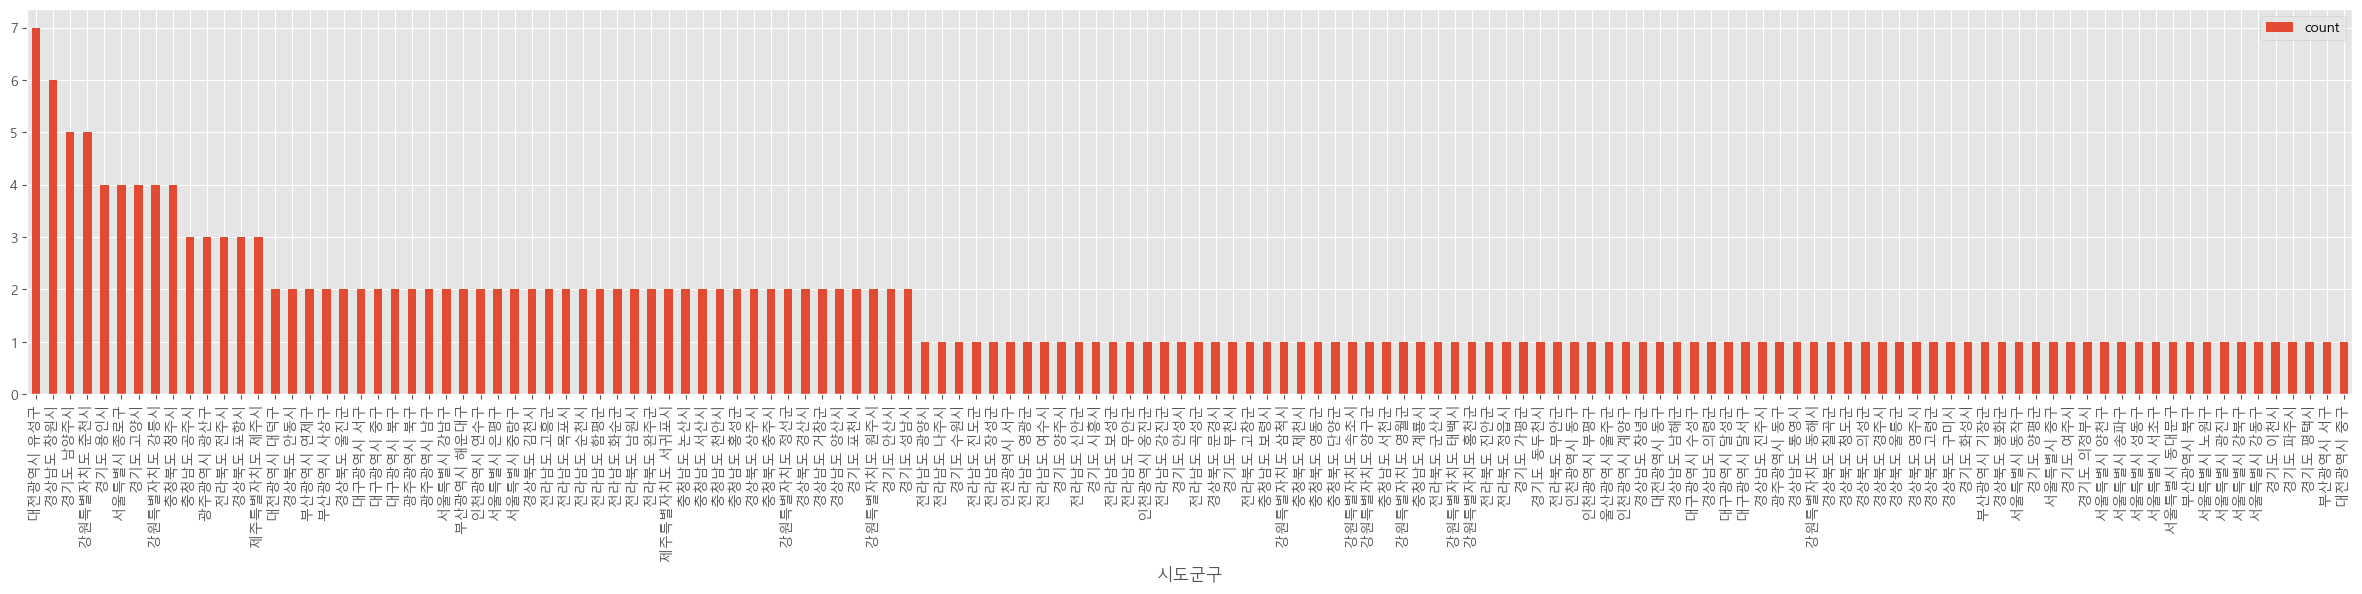

In [20]:
# 막대 그래프만 그리기. 
# 블록맵은 추가 설정이 필요해서, 다음시간에 
from matplotlib import pyplot as plt 
from matplotlib import rcParams, style
style.use("ggplot")

from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgunbd.ttf").get_name()
rc("font", family = font_name)

HS_ratio = local_Hospital_Population[["count"]]
HS_ratio = HS_ratio.sort_values("count", ascending=False)
plt.rcParams["figure.figsize"] = (30,5)
HS_ratio.plot(kind = "bar", rot = "vertical")
plt.show()
